In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
plt.rcParams['font.size']=10
sys.path.append("../../modules/")
#import geostat as geo

In [4]:
def create_mat(x):
    mat = np.zeros([x.shape[0],x.shape[0]])
    for i1,p in enumerate(x):
        i1 = int(i1)
        for i2,p2 in enumerate(x):
            i2 = int(i2)
            mat[i1,i2] = ((p[0]-p2[0])**2 + (p[1]-p2[1])**2)**0.5
    return mat

def vario_gauss(h,a,palier):
    var = palier*(1-np.e**(-3*(h/a)**2))
    return var

def vario_exp(h,a,palier):
    var = palier*(1-np.e**((-h/a)))
    return var

In [17]:
10**0.5

3.1622776601683795

In [11]:
d

,X_RGF93_L93,Y_RGF93_L93,T_SCI_plio,Unnamed: 3
0,691940.000000,6.164860e+06,0.000008,NaN
1,691672.000000,6.176245e+06,0.000080,NaN
2,688564.347144,6.186473e+06,0.000100,NaN
3,679061.000000,6.169710e+06,0.000100,NaN
4,679065.000000,6.169710e+06,0.000100,NaN
...,...,...,...,...
266,696915.300000,6.160365e+06,0.000500,NaN
267,683728.500000,6.159273e+06,0.001130,NaN
268,698277.709238,6.177218e+06,0.000620,NaN
269,686576.075023,6.165353e+06,0.000050,NaN


Text(0.5, 1.0, 'vario plio')

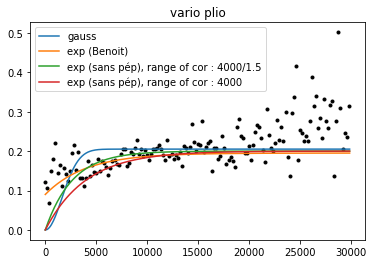

In [5]:
data = "../../data/T&K/T_plio.csv"
d = pd.read_csv(data,sep=";")
x = d.iloc[:,[0,1]].values
v = d.iloc[:,2]
v = np.log10(v)

mat = create_mat(x)

dh = 200
dist = 30000
for h in range(0,dist,dh):
    ip1,ip2 = np.where((mat < h+dh)&(mat>h))
    val=(v[ip1].values - v[ip2].values)
    plt.plot(h,0.5*np.var(val),".",color="k")
plt.plot(np.arange(0,dist,1e2),vario_gauss(np.arange(0,dist,1e2),4000,0.205),label="gauss")
plt.plot(np.arange(0,dist,1e2),0.09+vario_exp(np.arange(0,dist,1e2),4000,0.105),label="exp (Benoit)")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),4000/1.5,0.20),label="exp (sans pép), range of cor : 4000/1.5")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),4000,0.20),label="exp (sans pép), range of cor : 4000")
plt.legend()
plt.title("vario plio")

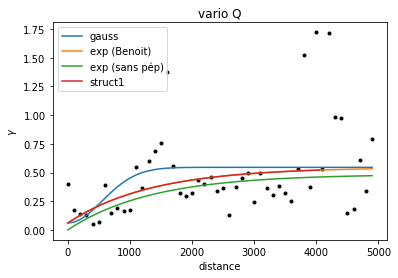

In [21]:
data = "../../data/T&K/T_Q.csv"
d = pd.read_csv(data,sep=";")
x = d.iloc[:,[0,1]].values
v = d.iloc[:,2]
v = np.log10(v)

# matric of distance
mat = create_mat(x)

dh = 100
dist = 5000
for h in range(0,dist,dh):
    ip1,ip2 = np.where((mat < h+dh)&(mat>h))
    val=(v[ip1].values - v[ip2].values)
    plt.plot(h,0.5*np.var(val),".",color="k")
plt.plot(np.arange(0,dist,1e2),0.06+vario_gauss(np.arange(0,dist,1e2),1350,0.485),label="gauss")
plt.plot(np.arange(0,dist,1e2),0.06+vario_exp(np.arange(0,dist,1e2),1350,0.485),label="exp (Benoit)")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),1350,0.485),label="exp (sans pép)")
plt.title("vario Q")

import pyemu
vq2 = pyemu.geostats.ExpVario(a=1350,contribution=0.485)
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2,nugget=0.06, transform='log')
#grid_q1.plot()
grid_q2.plot()

plt.legend(loc="upper left")